In [33]:
import collections
import math
from collections import defaultdict


# define class graph


class Graph:
    def __init__(self):
        self.vertices=set()
        self.edges= collections.defaultdict(list)
        self.weights={}#empty dictionary
        self.bigd={}
        self.edgelist=[]
    
    def add_vertex(self, value):
        self.vertices.add(value)  
   
   
    def add_edge(self, from_vertex, to_vertex, distance):
        self.edges[from_vertex].append(to_vertex)
        self.weights[(from_vertex, to_vertex)] = distance
        self.bigd[(from_vertex, to_vertex)] = 1
        self.edgelist.append((from_vertex, to_vertex))  
        
    def add_doubleedge(self, from_vertex, to_vertex, distance):
        self.edges[from_vertex].append(to_vertex)
        self.edges[to_vertex].append(from_vertex)
        self.weights[(from_vertex, to_vertex)] = distance
        self.weights[(to_vertex, from_vertex)] = distance
        self.bigd[(from_vertex, to_vertex)] = 1
        self.bigd[(to_vertex,  from_vertex)] = 1
        self.edgelist.append((from_vertex, to_vertex))    
        self.edgelist.append((to_vertex, from_vertex))  
        
        
        
def bigd(G, start, end):   #如果有邊 輸出1 , 如果沒邊 輸出0
    if (start, end) in G.bigd.keys():
        return G.bigd[(start, end)]
    else:
        return 0

        
        
        
    
        

In [12]:
set().update('fg', 'hi')

None


In [16]:
def dijkstra(graph, start):
    S=set()
    delta=dict.fromkeys(list(graph.vertices), math.inf) #change set into list and give each edge a weight called infinity
    previous = dict.fromkeys(list(graph.vertices), None)
    delta[start]=0
    while S != graph.vertices:
        v = min((set(delta.keys()) - S), key=delta.get)
        for neighbor in set(graph.edges[v]) - S:
            new_path = delta[v]+graph.weights[v,neighbor]
            if new_path < delta[neighbor]:
        # since it's optimal, update the shortest path for neighbor
                delta[neighbor] = new_path
                previous[neighbor] = v
        S.add(v)
    return (delta, previous)    
        
 
def shortest_path(graph, start, end):
  delta, previous = dijkstra(graph, start)
  
  path = []
  vertex = end
 
  while vertex is not None:
    path.append(vertex)
    vertex = previous[vertex]
 
  path.reverse()
  return path


def length(graph, start, end):
    k=0
    for i in range(0, len(shortest_path(graph, start, end))-1):
        k+=graph.weights[(shortest_path(graph, start, end)[i],shortest_path(graph, start, end)[i+1])]
    return k
    

In [34]:
G = Graph()
G.add_vertex('a')
G.add_vertex('b')
G.add_vertex('c')
G.add_vertex('d')
G.add_vertex('e')
G.add_vertex('f')
G.add_vertex('g')

 
G.add_edge('a', 'b', 32)
G.add_edge('b', 'a', 32)
G.add_edge('f', 'a', 32)
G.add_edge('a', 'f', 3)
G.add_edge('b', 'f', 7)
G.add_edge('f', 'b', 7)


G.add_edge('b', 'c', 21)
G.add_edge('c', 'b', 21)
G.add_edge('b', 'e', 12)
G.add_edge('e', 'b', 12)


G.add_edge('c', 'e', 6)
G.add_edge('e', 'c', 6)
G.add_edge('c', 'g', 11)


G.add_edge('c', 'f', 2)
G.add_edge('f', 'c', 2)

G.add_edge('d', 'e', 13)
G.add_edge('e', 'd', 13)


G.add_edge('d', 'g', 9)
G.add_edge('g', 'd', 9)

 

dijkstra(G, 'a')
shortest_path(G, 'a', 'e')


['a', 'f', 'c', 'e']

In [35]:
G.vertices
G.edges

defaultdict(list,
            {'a': ['b', 'f'],
             'b': ['a', 'f', 'c', 'e'],
             'c': ['b', 'e', 'g', 'f'],
             'd': ['e', 'g'],
             'e': ['b', 'c', 'd'],
             'f': ['a', 'b', 'c'],
             'g': ['d']})

In [36]:
G.vertices

{'a', 'b', 'c', 'd', 'e', 'f', 'g'}

KeyError: 'e'

In [19]:
find_path(G, 'a', 'c', path=[])

['a', 'b', 'f', 'c']

In [21]:
find_all_paths(G, 'a', 'c', path=[])

[['a', 'b', 'f', 'c'],
 ['a', 'b', 'c'],
 ['a', 'b', 'e', 'c'],
 ['a', 'f', 'b', 'c'],
 ['a', 'f', 'b', 'e', 'c'],
 ['a', 'f', 'c']]

In [37]:
def find_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in dict(graph.edges).keys():
        return None
    for node in graph.edges[start]:
        if node not in path:
            newpath = find_path(graph, node, end, path)
            if newpath: return newpath
    return None
def find_all_paths(graph, start, end, path=[]):  #these code can find all paths from start to end
    path = path + [start]
    if start == end:
        return [path]
    if not start in  dict(graph.edges).keys():
        return []
    paths = []
    for node in graph.edges[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [38]:
def Findhamiltonian_Path(graph, start, end, path=[]):
    for i in find_all_paths(graph, start, end, path=[]):
        if len(i)==len(graph.vertices):
            return i

        
        
        
    

In [98]:
def list_append(lst, item):
  lst.append(item)
  return lst


def Findhamiltonian_Cycle(graph, start, end, path=[]):
    
    for i in find_all_paths(graph, start, end, path=[]):
        if len(i)==len(graph.vertices) and bigd(graph, i[len(graph.vertices)-1], start)==1:
             return list_append(i, start)
            
def Find_all_hamiltonian_Cycle(graph, start):
    a=[]
    for i in list(G.vertices-set(start)):
        list_append(a, Findhamiltonian_Cycle(graph, start, i, path=[]))
    return a    
            

In [81]:
Findhamiltonian_Cycle(G, 'a', 'b', path=[])

['a', 'f', 'c', 'g', 'd', 'e', 'b', 'a']

In [82]:
G = Graph()
G.add_vertex('a')
G.add_vertex('b')
G.add_vertex('c')
G.add_vertex('d')
G.add_vertex('e')


 
G.add_edge('a', 'b', 0)
G.add_edge('b', 'a', 0)

G.add_edge('a', 'c', 0)
G.add_edge('c', 'a', 0)

G.add_edge('b', 'c', 0)
G.add_edge('c', 'b', 0)

G.add_edge('d', 'c', 0)
G.add_edge('c', 'd', 0)

G.add_edge('d', 'b', 0)
G.add_edge('b', 'd', 0)

G.add_edge('e', 'b', 0)
G.add_edge('b', 'e', 0)

G.add_edge('e', 'a', 0)
G.add_edge('a', 'e', 0)


G.add_edge('e', 'd', 0)
G.add_edge('d', 'e', 0)


 

In [96]:
Findhamiltonian_Cycle(G, 'a', 'e', path=[])

['a', 'b', 'c', 'd', 'e', 'a']

In [97]:
Findhamiltonian_Cycle(G, 'a', 'c', path=[])

['a', 'b', 'e', 'd', 'c', 'a']

In [86]:
list(G.vertices)  

['e', 'c', 'b', 'd', 'a']

In [99]:
Find_all_hamiltonian_Cycle(G, 'a')

[['a', 'b', 'c', 'd', 'e', 'a'],
 ['a', 'b', 'e', 'd', 'c', 'a'],
 ['a', 'c', 'd', 'e', 'b', 'a'],
 None]

In [102]:
G = Graph()
G.add_vertex('a')
G.add_vertex('b')
G.add_vertex('c')
G.add_vertex('d')
G.add_vertex('e')


 
G.add_doubleedge('a', 'b', 0)
G.add_doubleedge('a', 'c', 0)
G.add_doubleedge('a', 'e', 0)
G.add_doubleedge('a', 'd', 0)
G.add_doubleedge('c', 'b', 0)
G.add_doubleedge('d', 'c', 0)
G.add_doubleedge('c', 'e', 0)
G.add_doubleedge('e', 'd', 0)


In [103]:
Find_all_hamiltonian_Cycle(G, 'a')

[['a', 'b', 'c', 'd', 'e', 'a'],
 None,
 ['a', 'e', 'd', 'c', 'b', 'a'],
 ['a', 'b', 'c', 'e', 'd', 'a']]

In [114]:
#Euler graph
def degree(graph, start):
    return len(graph.edges[start])
def check_how_many_odd(graph):
    a=0
    for i in list(graph.vertices):
        if degree(graph, i)%2==1:
            a+=1
    return a

In [115]:
check_how_many_odd(G)

2

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [47]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1, 2)
G.add_edge(3, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
list(G.edges)

[(1, 2), (1, 3), (1, 4), (2, 3)]

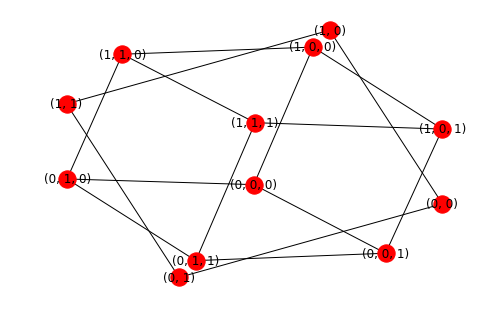

In [58]:
nx.draw(G, with_labels=True)

G = nx.hypercube_graph(2)
nx.draw(G, with_labels=True)

In [60]:
fast_gnp_random_graph(3, 4, seed=None, directed=False)

NameError: name 'fast_gnp_random_graph' is not defined